### Import necessary packages 

In [1]:
import os
import numpy as np
import h5py
import scipy.io
np.random.seed(7) # for reproducibility

import keras.backend as K
from keras.models import Model, load_model

import matplotlib.pyplot as plt
import matplotlib
#from concise.utils.plot import seqlogo, seqlogo_fig

import sys
sys.path.append("../Scripts/")
from IntegratedGradients import *
from util_funcs import *
from plotseqlogo import seqlogo, seqlogo_fig


Using TensorFlow backend.


### load data and trained models

In [2]:
#load data
path_to_data = "../Data/"

path_to_datahigh = path_to_data + "data_RBPshigh.h5"
path_to_datamed = path_to_data + "data_RBPsmed.h5"
path_to_datalow = path_to_data + "data_RBPslow.h5"

X_test_seq_high, X_test_region_high, y_test_RBP_high, y_test_name_high, y_train_high = load_data(path_to_datahigh)
X_test_seq_med, X_test_region_med, y_test_RBP_med, y_test_name_med, y_train_med = load_data(path_to_datamed)
X_test_seq_low, X_test_region_low, y_test_RBP_low, y_test_name_low, y_train_low = load_data(path_to_datalow)

#load models and obtain prediction and integrated_gradients

path_to_model = "../Results/"
path_to_modelhigh= path_to_model + "model_RBPshigh.h5"
path_to_modelmed= path_to_model + "model_RBPsmed.h5"
path_to_modellow= path_to_model + "model_RBPslow.h5"

model_high=load_model(path_to_modelhigh, custom_objects={'precision': precision,'recall': recall }) 
pred_high=model_high.predict([X_test_seq_high,X_test_region_high])
igres_high = integrated_gradients(model_high) 

model_med=load_model(path_to_modelmed, custom_objects={'precision': precision,'recall': recall }) 
pred_med=model_med.predict([X_test_seq_med,X_test_region_med])
igres_med = integrated_gradients(model_med) 

model_low=load_model(path_to_modellow, custom_objects={'precision': precision,'recall': recall }) 
pred_low=model_low.predict([X_test_seq_low,X_test_region_low])
igres_low = integrated_gradients(model_low) 

#RBPnames for each model
RBPnames_low=np.array(['MBNL1', 'P53_NONO', 'PUM2', 'QKI', 'AGO3', 'FUS', 'TAF15', 'ZFP36', 'DICER1', 'EIF3A', 'EIF3D', 'EIF3G', 'SSB', 'PAPD5', 'CPSF4', 'CPSF3', 'RTCB', 'FXR1', 'NOP58', 'NOP56', 'FBL', 'LIN28A', 'LIN28B', 'UPF1', 'G35', 'G45', 'XPO5'])
RBPnames_med=np.array(['TARDBP', 'ELAVL2', 'ELAVL3', 'ELAVL4', 'RBM20', 'IGF2BP1', 'IGF2BP2', 'IGF2BP3', 'EWSR1', 'HNRNPD', 'RBPMS', 'SRRM4', 'AGO2', 'NUDT21', 'FIP1L1', 'CAPRIN1', 'FMR1iso7', 'FXR2', 'AGO1', 'L1RE1', 'ORF1'])
RBPnames_high=np.array(['DND1', 'CPSF7', 'CPSF6', 'CPSF1', 'CSTF2', 'CSTF2T', 'ZC3H7B', 'FMR1iso1', 'RBM10', 'MOV10', 'ELAVL1'])


#number of tasks for each model
num_task_high=len(RBPnames_high)
num_task_med=len(RBPnames_med)
num_task_low=len(RBPnames_low)

Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.
Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.
Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.


### Interpretation of the model using integrated gradients

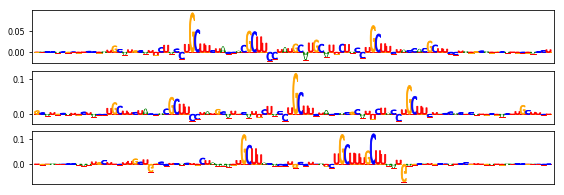

In [3]:
# one example from the low models, you can change the RBPname to see the attribution map of other RBPs in low models

X_test_seq = X_test_seq_low 
X_test_region = X_test_region_low 
y_test_RBP = y_test_RBP_low

RBPnames=RBPnames_low
pred=pred_low
igres=igres_low

RBPname="MBNL1"
RBP_index = np.where(RBPnames==RBPname)[0][0]
ind=[i[0] for i in sorted(enumerate(pred[:,RBP_index]), key=lambda x:x[1],reverse=True) if y_test_RBP[i[0],RBP_index]==1 and pred[i[0],RBP_index] > 0.50][0:3]
ex_seq=np.array([igres.explain([X_test_seq[i],X_test_region[i]],outc=RBP_index,reference=False)[0] for i in ind])

plt.close("all")
seqlogo_fig(np.transpose(ex_seq[:,25:125,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
plt.show()

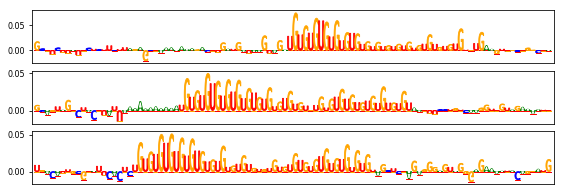

In [4]:
# one example from the med models, you can change the RBPname to see the attribution map of other RBPs in med models

X_test_seq = X_test_seq_med
X_test_region = X_test_region_med
y_test_RBP = y_test_RBP_med
RBPnames=RBPnames_med
pred=pred_med
igres=igres_med

RBPname="TARDBP"
RBP_index = np.where(RBPnames==RBPname)[0][0]
ind=[i[0] for i in sorted(enumerate(pred[:,RBP_index]), key=lambda x:x[1],reverse=True) if y_test_RBP[i[0],RBP_index]==1 and pred[i[0],RBP_index] > 0.50][0:3]
ex_seq=np.array([igres.explain([X_test_seq[i],X_test_region[i]],outc=RBP_index,reference=False)[0] for i in ind])

plt.close("all")
seqlogo_fig(np.transpose(ex_seq[:,25:125,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
plt.show()

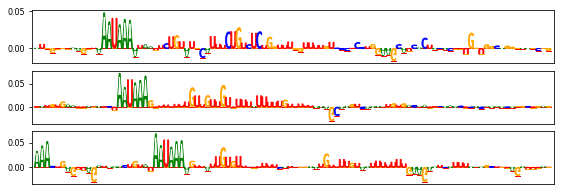

In [5]:
# one example from the high models, you can change the RBPname to see the attribution map of other RBPs in high models

X_test_seq = X_test_seq_high
X_test_region = X_test_region_high 
y_test_RBP = y_test_RBP_high
RBPnames=RBPnames_high
pred=pred_high
igres=igres_high

RBPname="CSTF2"
RBP_index = np.where(RBPnames==RBPname)[0][0]
ind=[i[0] for i in sorted(enumerate(pred[:,RBP_index]), key=lambda x:x[1],reverse=True) if y_test_RBP[i[0],RBP_index]==1 and pred[i[0],RBP_index] > 0.50][0:3]

ex_seq=np.array([igres.explain([X_test_seq[i],X_test_region[i]],outc=RBP_index,reference=False)[0] for i in ind])
plt.close("all")
plt.close("all")
seqlogo_fig(np.transpose(ex_seq[:,25:125,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
plt.show()
